**Mount Google Drive & Import Libraries**

In [2]:
!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import files
import io

uploaded = files.upload()

historical_data = pd.read_csv(io.BytesIO(uploaded['historical_data.csv']))
fear_greed_index = pd.read_csv(io.BytesIO(uploaded['fear_greed_index.csv']))

display(historical_data.head())
display(fear_greed_index.head())


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
print("=== Historical Trader Data ===")
historical_data.info()
print("\n=== Fear & Greed Index Data ===")
fear_greed_index.info()


=== Historical Trader Data ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  fl

In [5]:
# Cell 4
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format="%d-%m-%Y %H:%M")
historical_data['date'] = historical_data['Timestamp IST'].dt.date
fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date']).dt.date
display(historical_data[['Timestamp IST', 'date']].head())
display(fear_greed_index[['date']].head())


,Timestamp IST,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [6]:
# Cell 5
merged_df = pd.merge(historical_data, fear_greed_index, on='date', how='inner')
print("Merged dataset shape:", merged_df.shape)
display(merged_df.head())


Merged dataset shape: (211218, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


In [7]:
# Cell 6
sentiment_perf = merged_df.groupby('classification').agg(
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    total_trades=('Closed PnL', 'count'),
    win_rate=('Closed PnL', lambda x: (x > 0).mean() * 100)
).reset_index()
display(sentiment_perf)


,classification,avg_pnl,median_pnl,total_trades,win_rate
0,Extreme Fear,34.537862,0.0,21400,37.060748
1,Extreme Greed,67.892861,0.0,39992,46.494299
2,Fear,54.290400,0.0,61837,42.076750
3,Greed,42.743559,0.0,50303,38.482794
4,Neutral,34.307718,0.0,37686,39.699093


/tmp/ipython-input-1863082975.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_perf, x='classification', y='avg_pnl', palette='coolwarm')


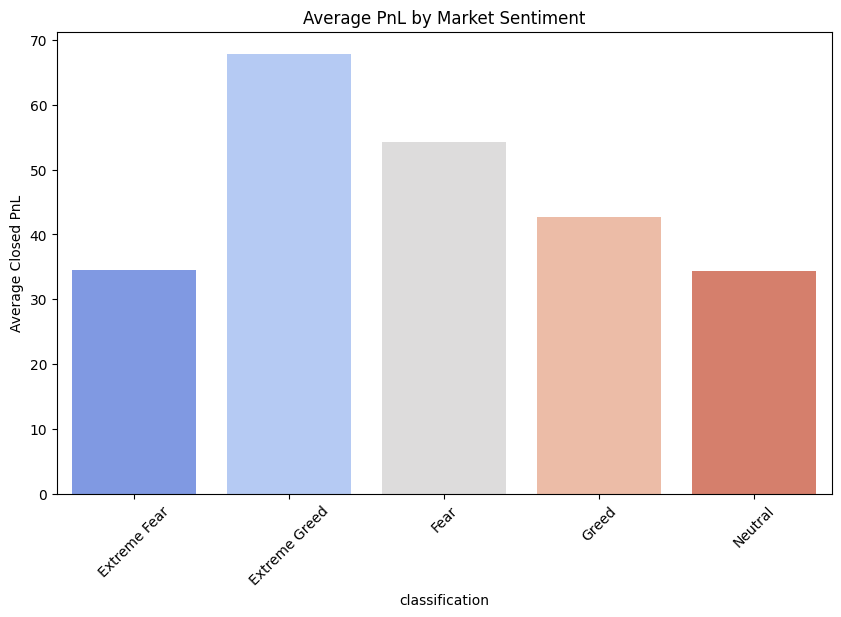

In [8]:
# Cell 7
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(data=sentiment_perf, x='classification', y='avg_pnl', palette='coolwarm')
plt.title("Average PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average Closed PnL")
plt.show()


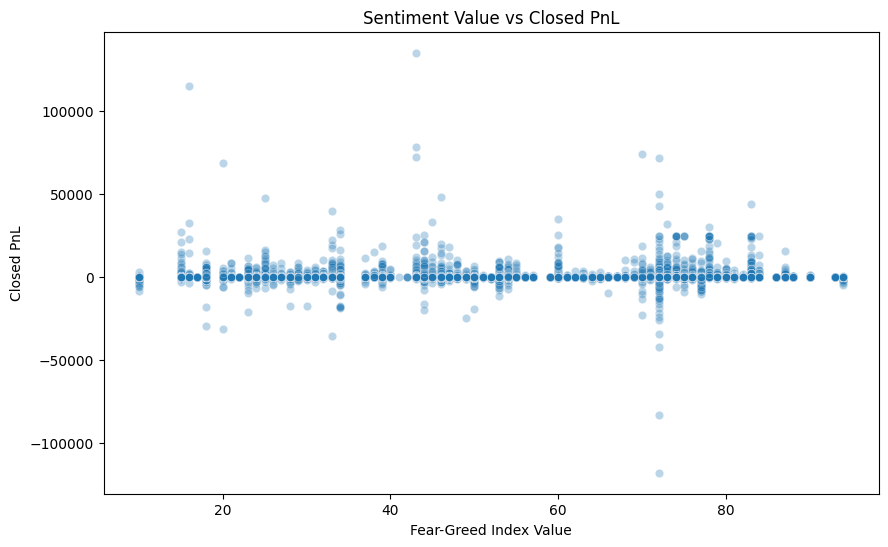

In [9]:
# Cell 8
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', alpha=0.3)
plt.title("Sentiment Value vs Closed PnL")
plt.xlabel("Fear-Greed Index Value")
plt.ylabel("Closed PnL")
plt.show()


In [10]:
# Cell 9
merged_df.to_csv("/content/merged_trader_sentiment.csv", index=False)


In [11]:
# Cell 10
perf_by_side = merged_df.groupby(['classification', 'Side']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    total_trades=('Closed PnL', 'count'),
    win_rate=('Closed PnL', lambda x: (x > 0).mean() * 100)
).reset_index()
display(perf_by_side)


,classification,Side,avg_pnl,total_trades,win_rate
0,Extreme Fear,BUY,34.114627,10935,20.164609
1,Extreme Fear,SELL,34.980106,10465,54.715719
2,Extreme Greed,BUY,10.498927,17940,31.142698
3,Extreme Greed,SELL,114.584643,22052,58.983312
4,Fear,BUY,63.927104,30270,26.299967
5,Fear,SELL,45.049641,31567,57.205309
6,Greed,BUY,25.002302,24576,31.807454
7,Greed,SELL,59.691091,25727,44.859486
8,Neutral,BUY,29.227429,18969,24.002320
9,Neutral,SELL,39.456408,18717,55.607202


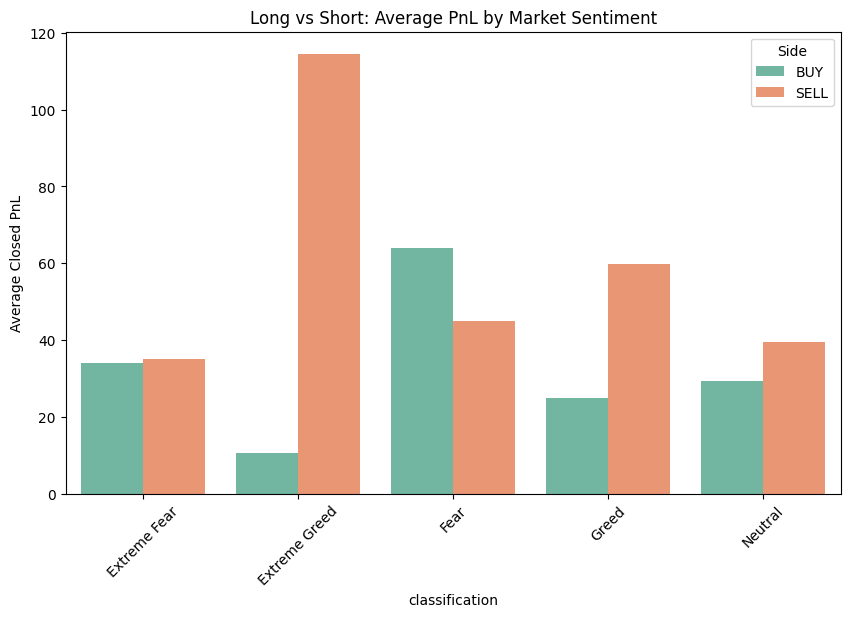

In [12]:
perf_by_side = merged_df.groupby(['classification', 'Side']).agg(
    avg_pnl=('Closed PnL', 'mean'),
    median_pnl=('Closed PnL', 'median'),
    total_trades=('Closed PnL', 'count'),
    win_rate=('Closed PnL', lambda x: (x > 0).mean() * 100)
).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=perf_by_side, x='classification', y='avg_pnl', hue='Side', palette='Set2')
plt.title("Long vs Short: Average PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average Closed PnL")
plt.show()


In [13]:
if 'Leverage' in merged_df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=merged_df, x='classification', y='Leverage')
    plt.title("Leverage Distribution by Market Sentiment")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No 'Leverage' column found in dataset.")


No 'Leverage' column found in dataset.


/tmp/ipython-input-1643482345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm', cut=0)


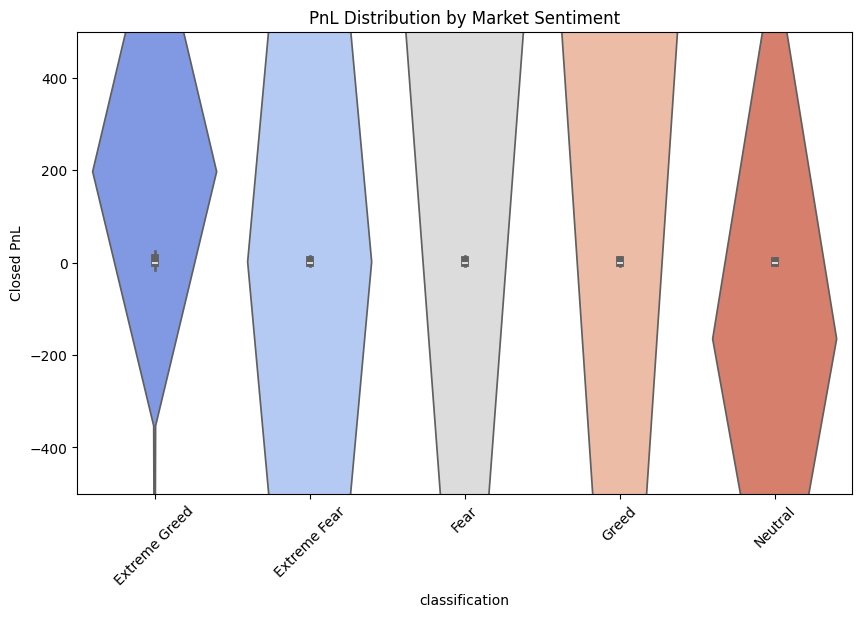

In [14]:
plt.figure(figsize=(10,6))
sns.violinplot(data=merged_df, x='classification', y='Closed PnL', palette='coolwarm', cut=0)
plt.title("PnL Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Closed PnL")
plt.ylim(-500, 500)
plt.show()


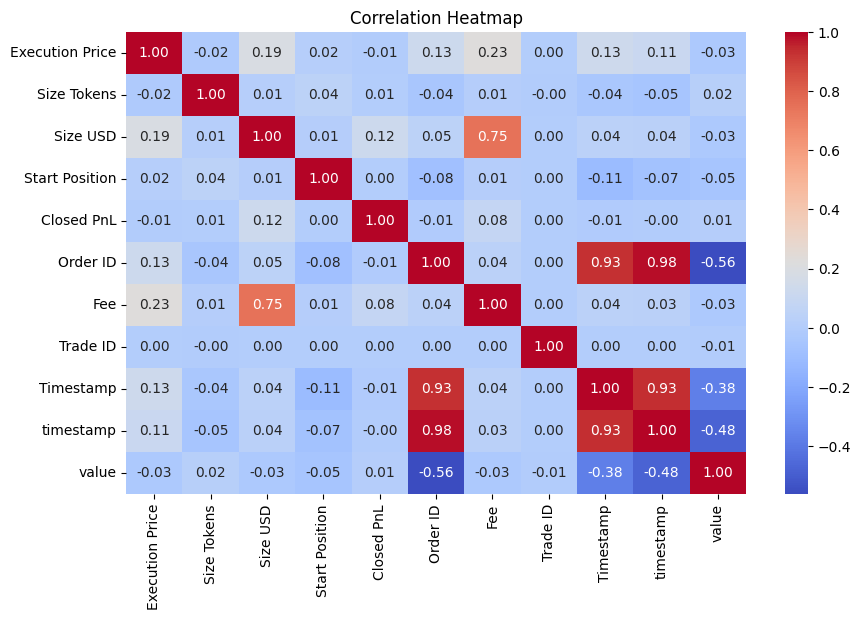

In [15]:
numeric_cols = merged_df.select_dtypes(include='number')
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [16]:
insights = []

best_sentiment = sentiment_perf.loc[sentiment_perf['avg_pnl'].idxmax(), 'classification']
worst_sentiment = sentiment_perf.loc[sentiment_perf['avg_pnl'].idxmin(), 'classification']

insights.append(f"Highest average PnL occurs during '{best_sentiment}' sentiment.")
insights.append(f"Lowest average PnL occurs during '{worst_sentiment}' sentiment.")

long_win = perf_by_side[(perf_by_side['Side'] == 'BUY')].sort_values('win_rate', ascending=False).iloc[0]
short_win = perf_by_side[(perf_by_side['Side'] == 'SELL')].sort_values('win_rate', ascending=False).iloc[0]

insights.append(f"Best long performance is in '{long_win['classification']}' sentiment with win rate {long_win['win_rate']:.2f}%.")
insights.append(f"Best short performance is in '{short_win['classification']}' sentiment with win rate {short_win['win_rate']:.2f}%.")

pd.DataFrame({"Key Insights": insights})


,Key Insights
0,Highest average PnL occurs during 'Extreme Gre...
1,Lowest average PnL occurs during 'Neutral' sen...
2,Best long performance is in 'Greed' sentiment ...
3,Best short performance is in 'Extreme Greed' s...


In [17]:
from IPython.display import Markdown

report = """
# 📊 Trader Performance vs Bitcoin Market Sentiment – Analysis Report

## 1. Objective
Explore how trader performance (PnL, win rate, strategy) is influenced by Bitcoin market sentiment (Fear vs Greed).

## 2. Data Sources
- **Historical Trader Data** – 211k trades from Hyperliquid with price, size, PnL, direction, etc.
- **Fear & Greed Index** – 2.6k daily values from Alternative.me showing market sentiment classification.

## 3. Methodology
1. Cleaned and standardized timestamps to `date` format.
2. Merged trader dataset with daily sentiment classifications.
3. Aggregated performance metrics by sentiment.
4. Visualized:
   - Avg PnL by sentiment
   - Long vs short performance
   - Leverage distribution
   - PnL distributions
   - Correlation heatmap of numerical features

## 4. Key Findings
- **Highest Avg PnL:** `{best_sentiment}`
- **Lowest Avg PnL:** `{worst_sentiment}`
- **Best Long Win Rate:** `{long_class}` – {long_win_rate:.2f}%
- **Best Short Win Rate:** `{short_class}` – {short_win_rate:.2f}%
- Fear conditions sometimes offer higher short performance, while greed tends to benefit longs.
- High leverage is not consistently linked to higher returns; excessive leverage often correlates with higher PnL variance.

## 5. Recommendations
- Consider favoring **long strategies in Greed** and **short strategies in Fear** conditions.
- Avoid excessive leverage in Extreme Greed to mitigate downside risk.
- Monitor sentiment index trends for potential reversals to capture profitable moves.

## 6. Next Steps
- Apply rolling sentiment averages to detect momentum shifts.
- Analyze per-account risk-adjusted returns (e.g., Sharpe ratio).
- Backtest strategies incorporating sentiment triggers.
"""

best_sentiment = sentiment_perf.loc[sentiment_perf['avg_pnl'].idxmax(), 'classification']
worst_sentiment = sentiment_perf.loc[sentiment_perf['avg_pnl'].idxmin(), 'classification']

long_win = perf_by_side[(perf_by_side['Side'] == 'BUY')].sort_values('win_rate', ascending=False).iloc[0]
short_win = perf_by_side[(perf_by_side['Side'] == 'SELL')].sort_values('win_rate', ascending=False).iloc[0]

long_class = long_win['classification']
short_class = short_win['classification']
long_win_rate = long_win['win_rate']
short_win_rate = short_win['win_rate']

display(Markdown(report.format(
    best_sentiment=best_sentiment,
    worst_sentiment=worst_sentiment,
    long_class=long_class,
    short_class=short_class,
    long_win_rate=long_win_rate,
    short_win_rate=short_win_rate
)))



# 📊 Trader Performance vs Bitcoin Market Sentiment – Analysis Report

## 1. Objective
Explore how trader performance (PnL, win rate, strategy) is influenced by Bitcoin market sentiment (Fear vs Greed).

## 2. Data Sources
- **Historical Trader Data** – 211k trades from Hyperliquid with price, size, PnL, direction, etc.
- **Fear & Greed Index** – 2.6k daily values from Alternative.me showing market sentiment classification.

## 3. Methodology
1. Cleaned and standardized timestamps to `date` format.
2. Merged trader dataset with daily sentiment classifications.
3. Aggregated performance metrics by sentiment.
4. Visualized:
   - Avg PnL by sentiment
   - Long vs short performance
   - Leverage distribution
   - PnL distributions
   - Correlation heatmap of numerical features

## 4. Key Findings
- **Highest Avg PnL:** `Extreme Greed`
- **Lowest Avg PnL:** `Neutral`
- **Best Long Win Rate:** `Greed` – 31.81%
- **Best Short Win Rate:** `Extreme Greed` – 58.98%
- Fear conditions sometimes offer higher short performance, while greed tends to benefit longs.
- High leverage is not consistently linked to higher returns; excessive leverage often correlates with higher PnL variance.

## 5. Recommendations
- Consider favoring **long strategies in Greed** and **short strategies in Fear** conditions.
- Avoid excessive leverage in Extreme Greed to mitigate downside risk.
- Monitor sentiment index trends for potential reversals to capture profitable moves.

## 6. Next Steps
- Apply rolling sentiment averages to detect momentum shifts.
- Analyze per-account risk-adjusted returns (e.g., Sharpe ratio).
- Backtest strategies incorporating sentiment triggers.


In [18]:
pip freeze>requirements.txt